# Grafos

Esta notebook repasa algunos conceptos de grafos y del tutorial de [python-igraph](http://igraph.org/python/doc/tutorial/tutorial.html)

## igraph-tutorial

En esta sección se irán siguiendo algunas cuestiones relacionadas al tutorial

In [144]:
from igraph import *

In [145]:
# El objeto principal para construir un grafo es Graph
g = Graph()

In [146]:
g

In [147]:
# print mostrara el grafo de una forma legible para humanos
print(g)

IGRAPH U--- 0 0 --


In [148]:
g.add_vertices(3)

In [149]:
g.add_edges([(0,1), (1,2)])

In [150]:
# print mostrara el grafo de una forma legible para humanos
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [151]:
# Captura una excepcion de igraph usando el tipo de error InternalError
try:
    g.add_edges([(5,0)])
except InternalError as e:
    print(e)

Error at type_indexededgelist.c:272: cannot add edges, Invalid vertex id


In [152]:
g.add_edges([(2,0)])

In [153]:
g.add_vertices(3)

In [154]:
g.add_edges([(2,3), (3,4), (4,5), (5,3)])

In [155]:
print(g)

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


In [156]:
# Las aristas tienen id que se pueden recuperar con la siguiente funcion
g.get_eid(2,3)

3

In [157]:
# Se pueden eliminar aristas
g.delete_edges(3)

In [158]:
# Mejor que print es usar summary
summary(g)

IGRAPH U--- 6 6 -- 


# Generando grafos

Referido a la seccion [correspondiente del tutorial](http://igraph.org/python/doc/tutorial/tutorial.html#generating-graphs)

La libreria cuenta con 2 tipos de generadores: *Deterministicos* y *estocasticos*.

Generadores *deterministicos* crean el mismo grafo si son invocados con los mismos parametros en forma sucesiva. Por el contrario, los generadores *estocasticos* construyen estructuras diferentes en cada llamada.

La libreria cuenta con bastantes generadores, por ello en el tutorial se tocan el **Tree** (*deterministico*) y **GRG** (*estocastico*).

## Generador Tree

In [159]:
g = Graph.Tree(127,2)
summary(g)

IGRAPH U--- 127 126 -- 


In [160]:
g2 = Graph.Tree(127,2)
g2.get_edgelist() == g.get_edgelist()

True

In [161]:
g2.get_edgelist()[0:10]

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (2, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10)]

## Generador GRG

In [162]:
g = Graph.GRG(100, 0.2)
summary(g)

IGRAPH U--- 100 534 -- 
+ attr: x (v), y (v)


In [163]:
g2 = Graph.GRG(100, 0.2)
summary(g2)

IGRAPH U--- 100 509 -- 
+ attr: x (v), y (v)


In [164]:
g.get_edgelist() == g2.get_edgelist()

False

In [165]:
# Controla si 2 grafos son isomorfos. Puede tomar mucho tiempo en grafos grandes
g.isomorphic(g2)

False

# Usando atributos en vertices y aristas

In [166]:
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

In [167]:
# Asigna a todos los nodos atributos
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]

# Asigna a todas las aristas atributos
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [168]:
# Seleccionar arista de forma individual
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7ffb9009ca98>, 0, {'is_formal': False})

In [169]:
g.es[0].attributes()

{'is_formal': False}

In [170]:
g.es[0]["is_formal"] = True
g.es[0] # Devuelve un objeto Edge

igraph.Edge(<igraph.Graph object at 0x7ffb9009ca98>, 0, {'is_formal': True})

In [171]:
# Todo el grafo puede tratarse como un dict
g['date'] = '2018-08-10'
print(g["date"])

2018-08-10


In [172]:
g.vs[3]['foo'] = 'bar'
g.vs['foo']

[None, None, None, 'bar', None, None, None]

In [173]:
try:
    del g.vs['foo']
    g.vs['foo']
except KeyError as e:
    print(e)

'Attribute does not exist'


## Propiedades estructurales de los grafos

In [174]:
# Grado de un vertice
print(g.degree())
# Grado entrante y saliente si es dirigido
# g.degree(mode=IN) g.degree(mode=OUT)

# Grado de un vertice puntual
print(g.degree(6))

# Grado de un subconjunto de vertices
print(g.degree([2,3,4]))

[3, 1, 4, 3, 2, 3, 2]
2
[4, 3, 2]


In [175]:
# Betweenness
vbs = g.betweenness()

In [176]:
# Betweenness de aristas
ebs = g.edge_betweenness()

In [177]:
# Obtenemos las aristas con mayor betweenness
max_eb = max(ebs)
[g.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb ]

[(0, 1), (0, 2)]

In [178]:
# Obtenemos los nodos con mayor betweenness
max_vb = max(vbs)
[g.vs[idx] for idx, vb in enumerate(vbs) if vb == max_vb]

[igraph.Vertex(<igraph.Graph object at 0x7ffb9009ca98>, 2, {'name': 'Claire', 'gender': 'f', 'age': 18})]

In [179]:
# Estos metodos estructurales pueden ser invocados de forma parcial mediante el uso de las secuencias o array slicing
g.vs.degree()
g.es.edge_betweenness()
g.vs[2].degree()
g.vs[1:3].degree()

[1, 4]

## Consultando vertices y aristas por sus atributos

### Seleccionando vertices y aristas

In [180]:
# select permite filtrar vertices en funcion a algun atributo
g.vs.select(_degree = g.maxdegree())["name"]

['Claire']

In [181]:
# Si el primer argumento de select es None, una secuencia vacia es retornada
seq = g.vs.select(None)
len(seq)

0

In [182]:
# Si el primer argumento posicional es algun callable, se ejecutara por cada vertice
#  y retorna una secuencia con los que resulten True
graph = Graph.Full(10)
only_odd_vertices = graph.vs.select(lambda vertex: vertex.index % 2 == 1)
len(only_odd_vertices)

5

In [183]:
# Si es un iterable, retorna enteros que representan indices de la secuencia actual (no del grafo completo)
seq = graph.vs.select([2, 3, 7])
len(seq)

3

In [184]:
[v.index for v in seq]

[2, 3, 7]

In [185]:
seq = seq.select([0, 2])
[v.index for v in seq]

[2, 7]

In [186]:
# Todo tipo de id invalido (o strings o float) seran ignorados sin lanzar excepcion
seq = graph.vs.select([2, 3, 7, "foo", 3.5])
len(seq)

3

In [187]:
# Una secuencia de enteros como parametros posicionales son interpretados como IDs de vertices
seq = graph.vs.select(2, 3, 7)
len(seq)

3

## Pruebas propias

Tareas:
- Modelar un grafo
- Calcular el shortest path para peso = 1
- Asignar pesos a todas las aristas, de forma que cambien los SP
- Recalcular el SP.

In [188]:
# ignorar
#g.es["peso"] = [3,6,8,9,10,4,6,3,8]
#g.get_shortest_paths(0,  weights="peso")

In [189]:
grafo = Graph()
grafo.add_vertices(5)
grafo.add_edges([(0,1), (0,2), (1,2), (1,4), (2,4), (2,3), (3,4), (0,3)])

grafo.vs["name"] = ["1", "2", "3", "4", "5"]

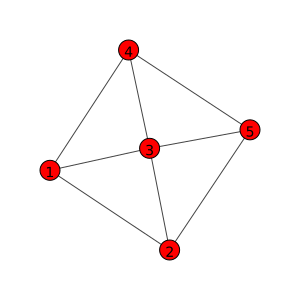

In [190]:
# Genero Layout
layout = grafo.layout("kk")

# Defino labels
grafo.vs["label"] = grafo.vs["name"]

# Dibuja grafo
plot(grafo, layout=layout, bbox=(300,300), margin=50)

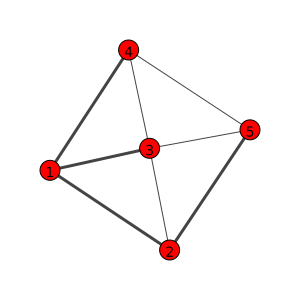

In [191]:
# Calculo SP y obtengo aristas involucradas
sp_edges = grafo.get_shortest_paths(0,  output="epath")

# Armo una unica lista con todas las aristas (TODO: Puede ser un conjunto asi no se repiten)
sp_edges_flatten = [item for sp in sp_edges for item in sp]

# Armo una lista que otorgue grosor a aristas con SP
edge_width = [3 if idx in sp_edges_flatten else 1 for idx,e in enumerate(grafo.es)]

# Dibuja grafo
plot(grafo, layout=layout, bbox=(300,300), margin=50, edge_width=edge_width)

In [192]:
# Peso a las aristas
grafo.es["peso"] = [3, 3, 6, 5, 9, 7, 1, 3]

# Se agrega label tambien que coincida con el peso
grafo.es["label"] = grafo.es["peso"]

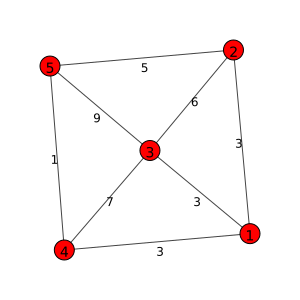

In [193]:
# Grafo generado
layout = grafo.layout("kk")
plot(grafo, layout=layout, bbox=(300,300), margin=50)

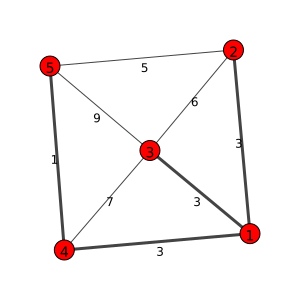

In [194]:
# Calculo SP y obtengo aristas involucradas
sp_edges = grafo.get_shortest_paths(0, weights="peso", output="epath")

# Armo una unica lista con todas las aristas (TODO: Puede ser un conjunto asi no se repiten)
sp_edges_flatten = [item for sp in sp_edges for item in sp]

# Armo una lista que otorgue grosor a aristas con SP
edge_width = [3 if idx in sp_edges_flatten else 1 for idx,e in enumerate(grafo.es)]

# Dibuja grafo
plot(grafo, layout=layout, bbox=(300,300), margin=50, edge_width=edge_width)

In [195]:
# Calcular por cada SP existente el Peso total del Path
sssp = grafo.get_shortest_paths(0, weights="peso", output="epath")
for sp in sssp:
    sum(grafo.es.select(sp)["peso"])
    print(grafo.es.select(sp), sum(grafo.es.select(sp)["peso"]))

<igraph.EdgeSeq object at 0x7ffb7351fdb0> 0
<igraph.EdgeSeq object at 0x7ffb7351fdb0> 3
<igraph.EdgeSeq object at 0x7ffb7351fdb0> 3
<igraph.EdgeSeq object at 0x7ffb7351fdb0> 3
<igraph.EdgeSeq object at 0x7ffb7351fdb0> 4
